In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
# Read CSV
data = pd.read_csv('energydata_complete_cleaned.csv')

In [20]:
data.isna().sum()

Livingroom_temp              0
Livingroom_Humidity          0
laundryRoom_Humidity         0
OfficeRoom_Humidity          0
BathRoom_Humidity            0
Outside_temp_building        0
Outside_humidity_building    0
IroningRoom_Humidity         0
Parentroom_temp              0
Parent_room_humidity         0
WeatherStn_Pressure          0
Windspeed                    5
NSM                          0
day_of_week                  0
month                        0
Energy                       0
dtype: int64

In [28]:
data['Windspeed'].fillna(data['Windspeed'].mean(), inplace=True)

In [38]:
data

,Livingroom_temp,Livingroom_Humidity,laundryRoom_Humidity,OfficeRoom_Humidity,BathRoom_Humidity,Outside_temp_building,Outside_humidity_building,IroningRoom_Humidity,Parentroom_temp,Parent_room_humidity,WeatherStn_Pressure,Windspeed,NSM,day_of_week,month,Energy
0,21.000000,43.700000,45.590000,47.030000,51.520000,6.000000,84.060000,42.626667,16.89,44.500000,736.216667,6.833333,82200,0,1,80
1,21.000000,43.590000,45.545000,46.526667,51.230000,5.966667,84.790000,42.760000,16.89,44.500000,736.300000,7.000000,82800,0,1,80
2,21.000000,43.590000,45.663333,46.400000,51.060000,5.900000,85.596667,43.030000,16.89,45.066667,736.400000,6.833333,83400,0,1,80
3,21.000000,43.700000,45.730000,46.433333,50.933333,5.763333,86.260000,43.163333,16.89,45.260000,736.500000,6.666667,84000,0,1,60
4,20.926667,43.760000,45.790000,46.567500,50.863333,5.623333,86.593333,43.400000,16.89,45.433333,736.600000,6.500000,84600,0,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33606,21.040000,38.080000,40.633333,39.733333,51.881667,0.466667,96.090000,37.184286,17.79,40.672500,765.033333,3.666667,67800,5,1,1110
33607,18.426667,33.963333,36.930000,35.400000,37.608333,-1.600000,90.933333,28.225000,16.00,36.930000,764.533333,1.000000,67800,3,1,1100
33608,18.566667,34.090000,36.863333,35.133333,37.728333,-1.730000,91.230000,28.153889,16.00,36.730000,764.500000,1.000000,68400,3,1,910
33609,20.856667,41.030000,38.260000,38.766667,46.800000,8.060000,48.730000,36.060000,19.73,39.863333,758.100000,2.000000,68400,4,3,890


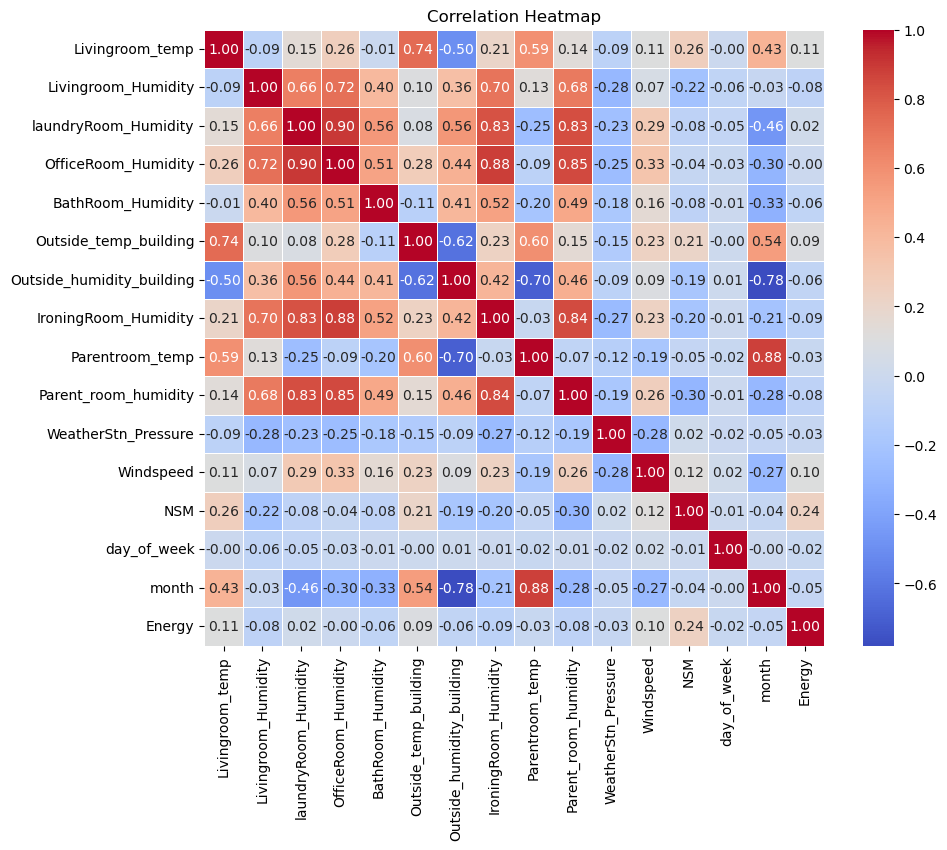

In [30]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

##### 2.4.1 Fit predictor and target variables using linear regression

In [31]:
# ANSWER

X = data.drop(columns =['Energy'])
Y = data['Energy']

##### 2.4.2Splitting Data

In [32]:
#### 3.2 Check Shape, Sample of Test Train Data

In [33]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [34]:
## Check training/test data
print (f"Train data shape: {X_train.shape}, Test data shape :{X_test.shape}")
print (f"Train output shape: {Y_train.shape}, Test output shape :{Y_test.shape}")

Train data shape: (22519, 15), Test data shape :(11092, 15)
Train output shape: (22519,), Test output shape :(11092,)


#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [36]:
# Create an instance of Linear Regression model
model = LinearRegression()

# Fit the model with training data
model.fit(X_train, Y_train)

LinearRegression()

0.09859220758387521

In [ ]:
user_inputs = {}
for column in X.columns:
    if column != 'Energy':
        column_data = X[column]  # Get the data for the current column
        min_value = column_data.min()
        max_value = column_data.max()
        user_input = float(input(f"Enter {column} (in range [{min_value}, {max_value}]): "))
        user_input = max(min_value, min(user_input, max_value))  # Ensure input is within range
        user_inputs[column] = [user_input]

# Create a DataFrame with the user inputs
user_inputs_df = pd.DataFrame(user_inputs)

# Use the trained model to make predictions
predicted_energy = model.predict(user_inputs_df)

print("Predicted Energy Consumption in Wh:", predicted_energy[0])

In [44]:
# Calculate R-squared value on the test data
r_squared = model.score(X_test, Y_test)
r_squared

0.09859220758387521

##  Forward Feature Selection
Forward Selection: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

Create a Regression model using Forward Feature Selection by looping over all the features adding one at a time until there are no improvements on the prediction metric ( R2 and AdjustedR2 in this case).

In [48]:
df = pd.read_csv("energydata.csv")

In [51]:
column_names =df.columns

column_descriptions = ['date','Appliance_Use_WH', 'Light_Usage_Wh', 
                       'Kitchen_temp', 'Kitchen_Humidity', 
                       'Livingroom_temp', 'Livingroom_Humidity',
                       'laundryRoom_Temp', 'laundryRoom_Humidity', 
                       'OfficeRoom_Temp', 'OfficeRoom_Humidity', 
                       'BathRoom_Temp', 'BathRoom_Humidity', 
                       'Outside_temp_building', 'Outside_humidity_building',
                      'IroningRoom_Temp', 'IroningRoom_Humidity',
                      'TeenRoom_Temp', 'TeenRoom_Humidity', 
                       'Parentroom_temp', 'Parent_room_humidity',
                      'WeatherStn_temp', 'WeatherStn_Pressure','WeatherStn_humidity',
                       'Windspeed','WeatherStn_Visibility', 'Dew_point_temp',
                      'RandVar1','RandVar2']


# Create a dictionary to map column names to their descriptions
column_dict = dict(zip(column_names, column_descriptions))

# Now, you can use this dictionary to replace column names in your DataFrame
df.rename(columns=column_dict, inplace=True)

In [52]:
df['Energy'] = df ['Light_Usage_Wh']+ df["Appliance_Use_WH"]

In [53]:

df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M', utc=True)
# Adding the 'seconds' column to represent the number of seconds from midnight
df['NSM'] = df['date'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

# Adding the 'day_of_week' column to represent the day of the week (Monday as 0, Tuesday as 1, etc.)
df['day_of_week'] = df['date'].apply(lambda x: x.dayofweek)

# Adding the 'week_status' column to represent whether it's a weekend (0) or weekday (1)
df['week_status'] = df['day_of_week'].apply(lambda x: 0 if (x == 5 or x == 6) else 1)
df['month'] = df['date'].apply(lambda x: x.month)


In [55]:
df['Windspeed'].fillna(df['Windspeed'].mean(), inplace=True)

In [56]:
df_new = df.drop(columns = ['date', 'Appliance_Use_WH', 'Light_Usage_Wh'])

df_new.columns



Index(['Kitchen_temp', 'Kitchen_Humidity', 'Livingroom_temp',
       'Livingroom_Humidity', 'laundryRoom_Temp', 'laundryRoom_Humidity',
       'OfficeRoom_Temp', 'OfficeRoom_Humidity', 'BathRoom_Temp',
       'BathRoom_Humidity', 'Outside_temp_building',
       'Outside_humidity_building', 'IroningRoom_Temp', 'IroningRoom_Humidity',
       'TeenRoom_Temp', 'TeenRoom_Humidity', 'Parentroom_temp',
       'Parent_room_humidity', 'WeatherStn_temp', 'WeatherStn_Pressure',
       'WeatherStn_humidity', 'Windspeed', 'WeatherStn_Visibility',
       'Dew_point_temp', 'RandVar1', 'RandVar2', 'Energy', 'NSM',
       'day_of_week', 'week_status', 'month'],
      dtype='object')

In [62]:
# Take all columns except target as predictor columns
predictor_columns = [c for c in df_new.columns if c != 'Energy']
# Load the dataset as a pandas data frame
X = pd.DataFrame(df_new, columns = predictor_columns)
y = df_new['Energy']

In [98]:
## Create training and testing subsets

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [99]:
## Check training/test data
print (f"Train data shape: {X_train.shape}, Test data shape :{X_test.shape}")
print (f"Train output shape: {Y_train.shape}, Test output shape :{Y_test.shape}")

Train data shape: (11261, 30), Test data shape :(5547, 30)
Train output shape: (11261,), Test output shape :(5547,)


In [100]:
## Flag intermediate output

show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

In [101]:
# Initialize variables
included = []
best = {'feature': '', 'r2': 0, 'a_r2': 0}
model = LinearRegression()
n = X_train.shape[0]

r2_list = []
adjusted_r2_list = []

while True:
    changed = False
    
    # List the features to be evaluated
    excluded = list(set(X.columns) - set(included))

    for new_column in excluded:

        # Fit the model with the Training data
        model.fit(X_train[included + [new_column]], Y_train)
        
        # Calculate the score (R^2 for Regression)
        r2 = model.score(X_train[included + [new_column]], Y_train)
        
        # Number of predictors in this model
        k = len(included) + 1
        
        # Calculate the adjusted R^2
        adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

        # If model improves
        if adjusted_r2 > best['a_r2']:
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            changed = True
            
    if changed:
        included.append(best['feature'])
        excluded = list(set(excluded) - set([best['feature']]))
        r2_list.append( r2)
        adjusted_r2_list.append(adjusted_r2 )
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        break

print('')
print('Resulting features:')
print(', '.join(included))


Added feature NSM  with R^2 = 0.060 and adjusted R^2 = 0.060
Added feature Windspeed with R^2 = 0.066 and adjusted R^2 = 0.066
Added feature TeenRoom_Humidity with R^2 = 0.072 and adjusted R^2 = 0.071
Added feature Kitchen_Humidity with R^2 = 0.095 and adjusted R^2 = 0.095
Added feature Livingroom_Humidity with R^2 = 0.107 and adjusted R^2 = 0.107
Added feature IroningRoom_Humidity with R^2 = 0.111 and adjusted R^2 = 0.111
Added feature laundryRoom_Humidity with R^2 = 0.114 and adjusted R^2 = 0.114
Added feature laundryRoom_Temp with R^2 = 0.119 and adjusted R^2 = 0.118
Added feature Parentroom_temp with R^2 = 0.142 and adjusted R^2 = 0.141
Added feature Livingroom_temp with R^2 = 0.148 and adjusted R^2 = 0.147
Added feature TeenRoom_Temp with R^2 = 0.155 and adjusted R^2 = 0.154
Added feature BathRoom_Humidity with R^2 = 0.157 and adjusted R^2 = 0.156
Added feature month with R^2 = 0.159 and adjusted R^2 = 0.158
Added feature Outside_temp_building with R^2 = 0.160 and adjusted R^2 = 0

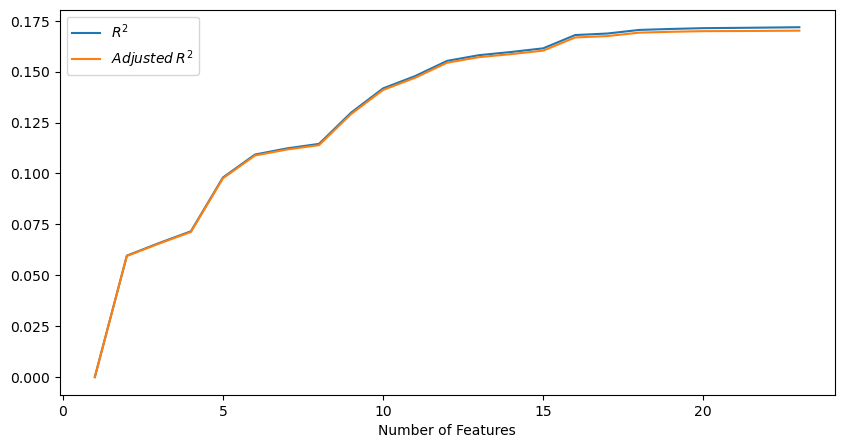

In [102]:
## Chart both R^2 and Adjusted R^2

_range = range(1, len(r2_list)+1)

# define chart size
plt.figure(figsize = (10, 5))
# plot each metric 
plt.plot(_range, r2_list, label = '$R^2$')
plt.plot(_range, adjusted_r2_list, label = '$Adjusted \: R^2$')
# add some better visualisation
plt.xlabel('Number of Features')
plt.legend()
# output the chart
plt.show()

In [96]:
# Exporting the cleaned dataset
df_new.to_csv('energydata_for_regularisation.csv', index=False)

In [107]:
X = df[included]
Y = df['Energy']

In [121]:
## Create training and testing subsets

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [123]:
# Assuming you have already trained your model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict on the training data
y_pred = model.predict(X_test)

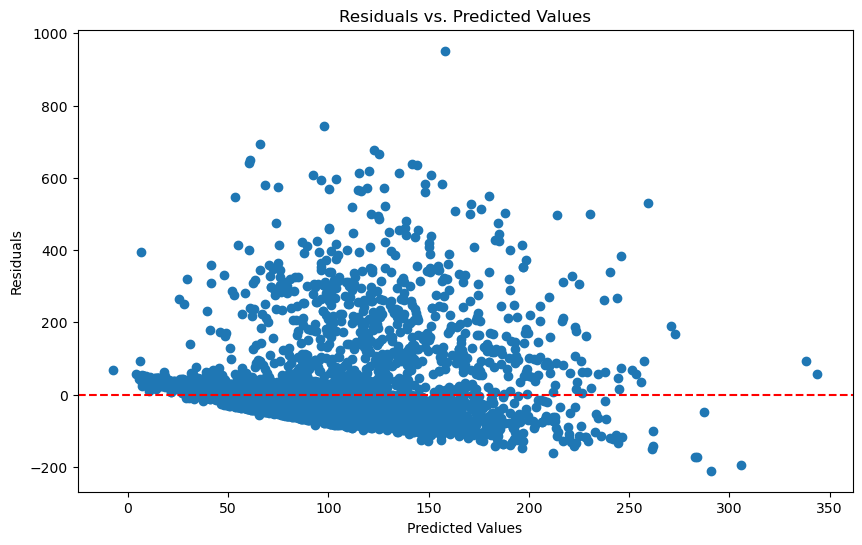

In [124]:
# Calculate residuals
residuals = Y_test - y_pred

# Create a scatter plot of residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

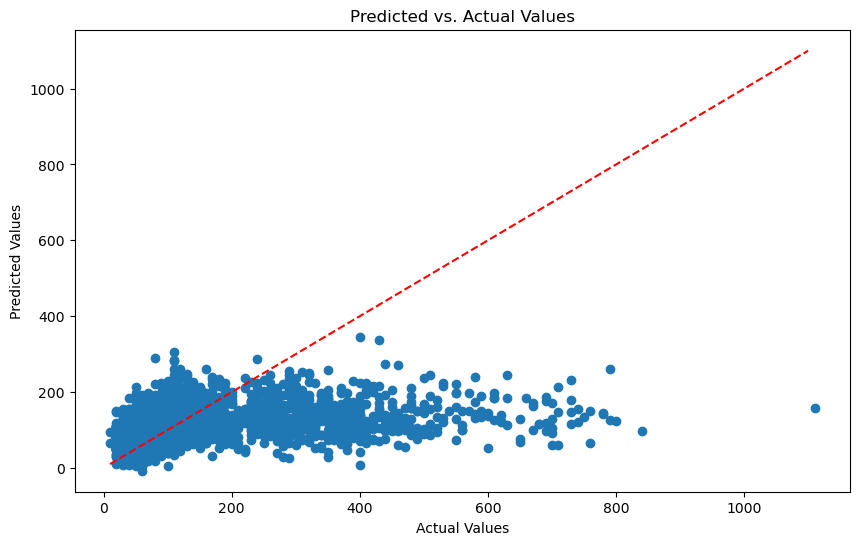

In [126]:
# ANSWER

# Create a scatter plot of predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred)
plt.plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_train)], color='red', linestyle='--')  # 45-degree line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.show()

In [116]:
user_inputs = {}
for column in X.columns:
    if column != 'Energy':
        column_data = X[column]  # Get the data for the current column
        min_value = column_data.min()
        max_value = column_data.max()
        user_input = float(input(f"Enter {column} (in range [{min_value}, {max_value}]): "))
        user_input = max(min_value, min(user_input, max_value))  # Ensure input is within range
        user_inputs[column] = [user_input]

# Create a DataFrame with the user inputs
user_inputs_df = pd.DataFrame(user_inputs)

# Use the trained model to make predictions
predicted_energy = model.predict(user_inputs_df)

print("Predicted Energy Consumption in Wh:", predicted_energy[0])

Enter NSM (in range [0, 85800]): 50000
Enter Windspeed (in range [0.0, 14.0]): 10
Enter TeenRoom_Humidity (in range [29.6, 57.715]): 30
Enter Kitchen_Humidity (in range [31.42666667, 51.63333333]): 30
Enter Livingroom_Humidity (in range [29.89, 51.2]): 30
Enter IroningRoom_Humidity (in range [23.2, 50.245]): 30
Enter laundryRoom_Humidity (in range [29.8, 49.03]): 30
Enter laundryRoom_Temp (in range [17.79, 27.03581818]): 18
Enter Parentroom_temp (in range [14.89, 24.39]): 18
Enter Livingroom_temp (in range [16.2, 25.56]): 18
Enter TeenRoom_Temp (in range [16.89, 26.89]): 18
Enter BathRoom_Humidity (in range [36.06, 66.035]): 40
Enter month (in range [1, 5]): 1
Enter Outside_temp_building (in range [-6.065, 22.69333333]): 2
Enter WeatherStn_temp (in range [-5.0, 20.4]): 2
Enter OfficeRoom_Temp (in range [15.69, 25.92666667]): 22
Enter Outside_humidity_building (in range [1.0, 99.9]): 20
Enter WeatherStn_Visibility (in range [1.0, 66.0]): 25
Enter week_status (in range [0, 1]): 0
Enter I

In [117]:
# Check Coeffiricent
model.coef_

array([ 3.59093953e-04,  2.80071240e+00, -5.58682271e+00,  1.53591012e+01,
       -1.34868358e+01, -1.28073787e+00,  4.84573133e+00,  2.59489989e+01,
       -2.02218032e+01, -2.23550420e+01,  1.30030850e+01, -1.04264012e+00,
       -8.25704973e+00,  8.56477696e+00, -8.20472438e+00,  8.24498655e+00,
        3.33054345e-01,  2.02628682e-01, -4.88242216e+00, -2.15901234e+00,
       -9.28593942e-01,  1.26615086e+00,  9.42927564e-01])

In [118]:
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'laundryRoom_Temp'),
  Text(1, 0, 'Livingroom_temp'),
  Text(2, 0, 'Parentroom_temp'),
  Text(3, 0, 'Kitchen_Humidity'),
  Text(4, 0, 'Livingroom_Humidity'),
  Text(5, 0, 'TeenRoom_Temp'),
  Text(6, 0, 'Outside_temp_building'),
  Text(7, 0, 'month'),
  Text(8, 0, 'OfficeRoom_Temp'),
  Text(9, 0, 'WeatherStn_temp'),
  Text(10, 0, 'TeenRoom_Humidity'),
  Text(11, 0, 'week_status'),
  Text(12, 0, 'laundryRoom_Humidity'),
  Text(13, 0, 'Windspeed'),
  Text(14, 0, 'IroningRoom_Temp'),
  Text(15, 0, 'IroningRoom_Humidity'),
  Text(16, 0, 'OfficeRoom_Humidity'),
  Text(17, 0, 'BathRoom_Humidity'),
  Text(18, 0, 'Dew_point_temp'),
  Text(19, 0, 'Parent_room_humidity'),
  Text(20, 0, 'Outside_humidity_building'),
  Text(21, 0, 'WeatherStn_Visibility'),
  Text(22, 0, 'NSM')])

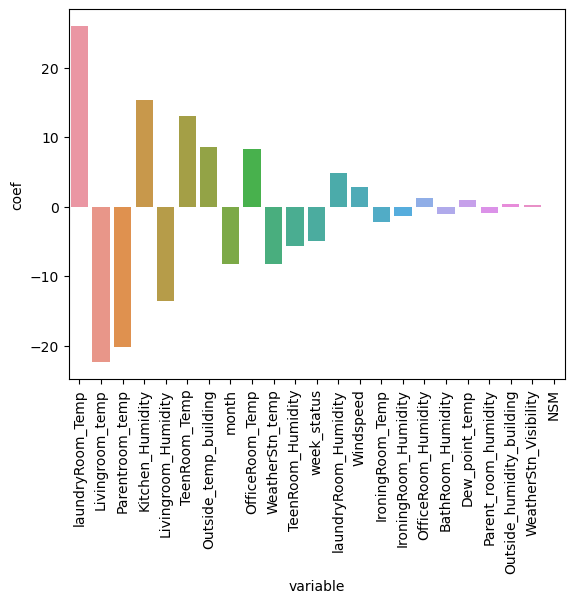

In [119]:
# Plot Coefficients
view_coeff(X, model)
plt.xticks(rotation= 90)

In [127]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 53.69052504489069


In [131]:
# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [134]:
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

In [135]:
# Loop over the folds
for k, (train, test) in enumerate(k_fold.split(X, y)):
    # Get training and test sets for X and y
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
    # Create and fit the model with training set
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions with training and test set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Score R2 and RMSE on training and test sets and store in list
    train_score = r2_score(y_train, y_train_pred)
    test_score = r2_score(y_test, y_test_pred)
    train_rmse_score = mean_squared_error(y_train, y_train_pred, squared=False)
    test_rmse_score = mean_squared_error(y_test, y_test_pred, squared=False)
    
    train_scores.append(train_score)
    train_rmse.append(train_rmse_score)
    test_scores.append(test_score)
    test_rmse.append(test_rmse_score)

# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = pd.DataFrame({
    'Fold': range(1, len(train_scores) + 1),
    'Train R2': train_scores,
    'Train RMSE': train_rmse,
    'Test R2': test_scores,
    'Test RMSE': test_rmse
})

print(metrics_df)

   Fold  Train R2  Train RMSE   Test R2  Test RMSE
0     1  0.171373   93.268949  0.177313  91.190665
1     2  0.178203   92.365834  0.150784  94.770385
2     3  0.171854   92.062029  0.174880  95.971924
3     4  0.174339   93.685427  0.164194  89.481646
4     5  0.170011   92.719361  0.181909  93.433243
